# 4.9 Intro to Data Visualization with Python

### The following Script Contains:
##### 1. Importing Data and Libraries
##### 2. Creating and Exporting a Bar Chart
##### 3. Creating Histograms and Scatterplots
##### 4. Sampling Data
##### 5. Creating Line Chart

#### 1. Importing Data and Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create string and import data
path = r'C:\Users\Jamie&Ken\Desktop\Data Analytics Course\Python Fundeamentals for Data Analysts\08-2024 Instacart Basket Analysis'
# Import dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'aggregated_ords_prods_merge.pkl'))

#### 2. Creating and Exporting a Bar Chart

<Axes: xlabel='weekday_of_order'>

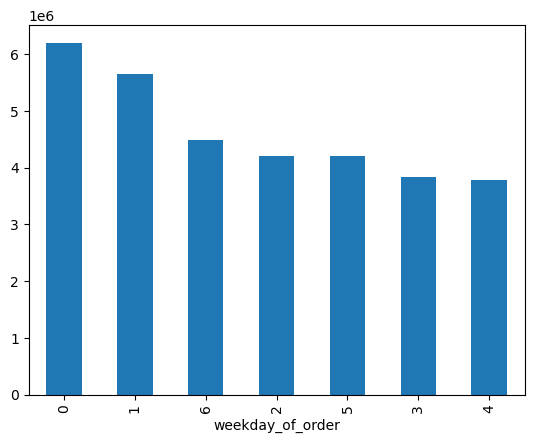

In [5]:
# creating bar chart for weekday_of_order
ords_prods_merge['weekday_of_order'].value_counts().plot.bar()

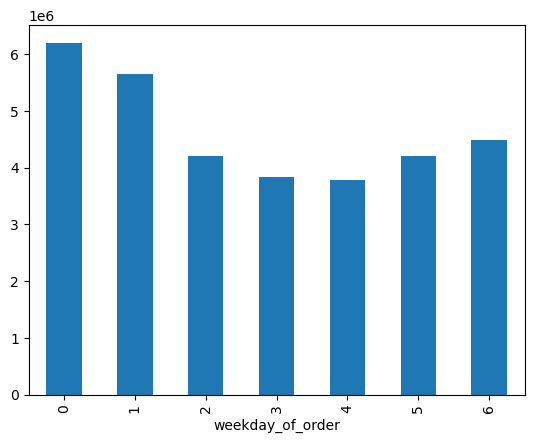

In [6]:
# sort bar by index column
bar = ords_prods_merge['weekday_of_order'].value_counts().sort_index().plot.bar()

<Axes: xlabel='weekday_of_order'>

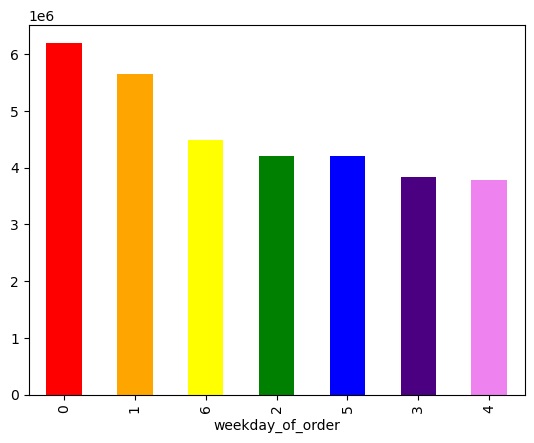

In [8]:
# Change colour of chart (test of colours)
ords_prods_merge['weekday_of_order'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

In [9]:
# Change colour of chart (design principles applied)

<Axes: xlabel='weekday_of_order'>

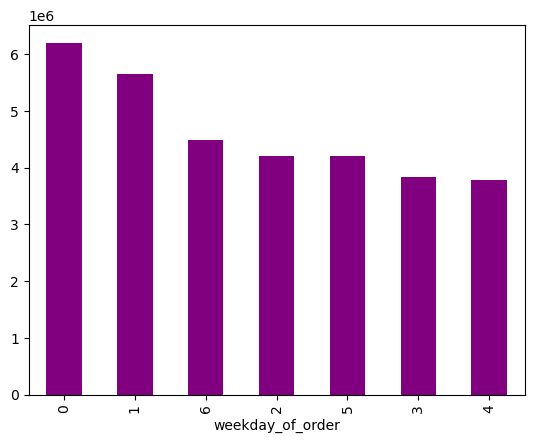

In [15]:
ords_prods_merge['weekday_of_order'].value_counts().plot.bar(color = ['purple'])

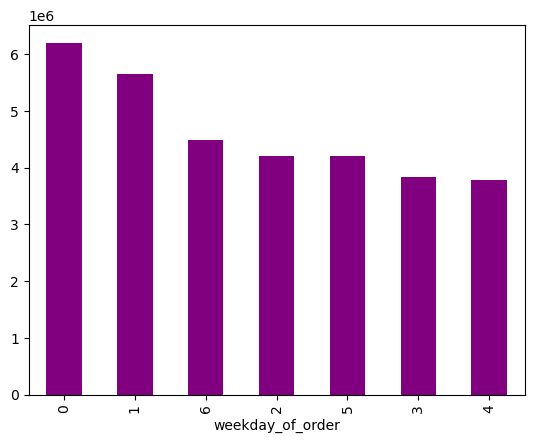

In [16]:
# save bar to jupyter memory
bar = ords_prods_merge['weekday_of_order'].value_counts().plot.bar(color = ['purple'])

In [17]:
# Export bar
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### 3. Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

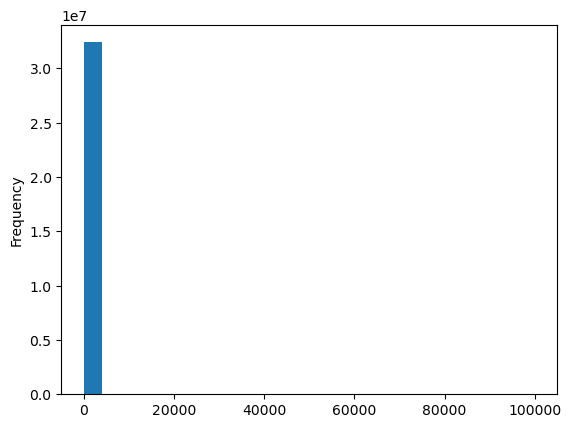

In [18]:
# Create histogram of "prices" column
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

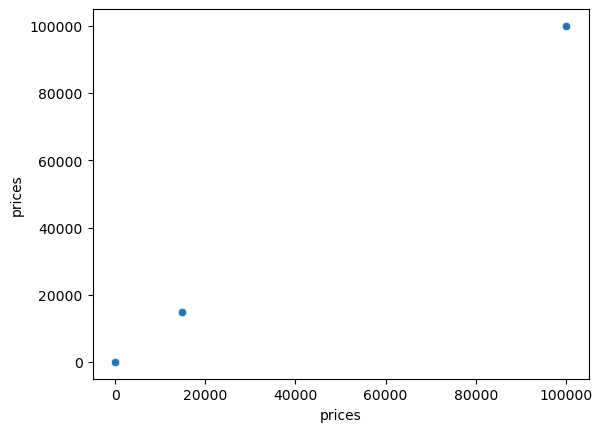

In [19]:
# Create scatterplot of "prices" column
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [24]:
# Checking for prices >100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,weekday_of_order,order_hour_of_day,...,busiest_period_of_day,max_order,loyalty_flag,average_spender,average_spende,average_spend,spender_flag,frequent_customer,customer_frequency,frequency_flag


In [25]:
# Mark values as missing so data skew fixed
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [26]:
# Check for command success
ords_prods_merge['prices'].max()

25.0

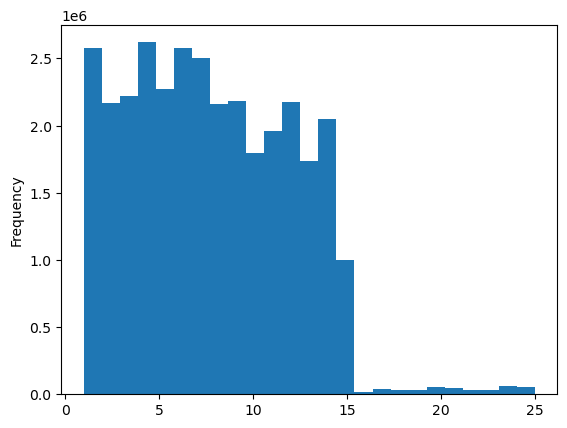

In [27]:
# remake histogram 
hist = ords_prods_merge['prices'].plot.hist(bins=25)

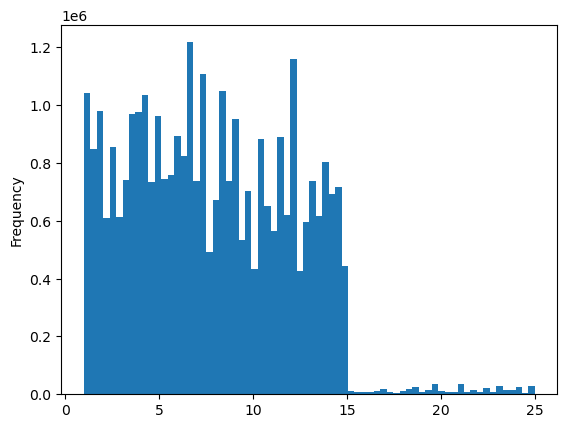

In [28]:
# increase granularity
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [29]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_bin25.png'))

In [30]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_bin70.png'))

#### 4. Sampling Data

In [31]:
# create 70/30 split df
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [32]:
# Check list
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# split list into two samples
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [34]:
# Verify lists are correct size
len(ords_prods_merge)
len(big) + len(small)

32404859

In [35]:
# Filter out unneeded columns from subset
df_2 = small[['weekday_of_order', 'prices']]

#### 5. Creating Line Chart

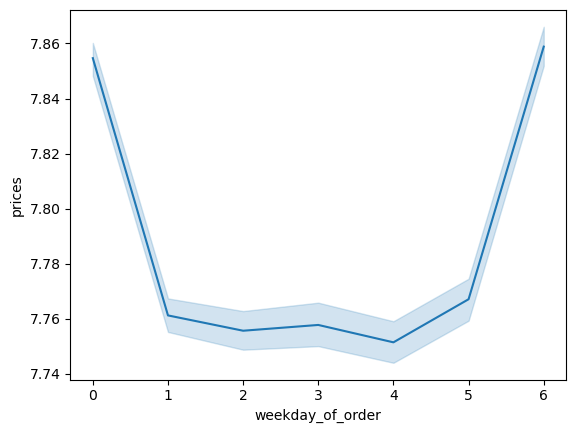

In [37]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'weekday_of_order',y = 'prices')

In [39]:
# Export chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))

In [40]:
# Export cleaned ords prods merge
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9_ords_prods_merge.pkl'))